In [1]:
import pandas as pd

# Reading the Dataset

In [2]:
df = pd.read_csv("complaints.csv")

In [3]:
df.iloc[200]

Date received                                                          2023-09-08
Product                         Credit reporting or other personal consumer re...
Sub-product                                                      Credit reporting
Issue                                        Incorrect information on your report
Sub-issue                                                Account status incorrect
Consumer complaint narrative                                                  NaN
Company public response                                                       NaN
Company                                                             EQUIFAX, INC.
State                                                                          IL
ZIP code                                                                    60074
Tags                                                                          NaN
Consumer consent provided?                                                    NaN
Submitted via   

In [4]:
df.describe()

,Complaint ID
count,4.052679e+06
mean,4.312214e+06
std,2.022740e+06
min,1.000000e+00
25%,2.867758e+06
50%,4.244799e+06
75%,6.131735e+06
max,7.528338e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4052679 entries, 0 to 4052678
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 556.

# Feature selection

In [6]:
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(1467297, 2)

In [7]:
df1.head()

,Product,Consumer_complaint
16,"Credit reporting, credit repair services, or o...",The existence of a derogatory rating on my acc...
29,Mortgage,XXXX XXXX is a rip-off company that never giv...
30,Mortgage,"XXXX Mortgage XXXX XXXX XXXX XXXX XXXX, NJ XXX..."
37,"Credit reporting, credit repair services, or o...",1 reviewed my Consumer Reports and noticed tha...
59,"Credit reporting, credit repair services, or o...",I have been fighting for the last two years to...


# Exploratory Data Analysis

In [8]:
category_var = pd.DataFrame(df1.Product.unique())
category_var

,0
0,"Credit reporting, credit repair services, or o..."
1,Mortgage
2,Vehicle loan or lease
3,Credit card or prepaid card
4,Checking or savings account
5,Debt collection
6,Student loan
7,"Money transfer, virtual currency, or money ser..."
8,"Payday loan, title loan, or personal loan"
9,Credit reporting or other personal consumer re...


In [9]:
r ={'Product':{
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit reporting, repair, or other',
    'Mortgage': 'Mortgage',
    'Vehicle loan or lease': 'Consumer Loan',
    'Credit card or prepaid card': 'Credit reporting, repair, or other',
    'Checking or savings account': 'Consumer Loan',
    'Debt collection': 'Debt collection',
    'Student loan': 'Consumer Loan',
    'Money transfer, virtual currency, or money service': 'Consumer Loan',
    'Payday loan, title loan, or personal loan': 'Consumer Loan',
    'Credit reporting or other personal consumer reports': 'Credit reporting, repair, or other',
    'Credit card': 'Credit reporting, repair, or other',
    'Payday loan, title loan, personal loan, or advance loan': 'Consumer Loan',
    'Bank account or service': 'Consumer Loan',
    'Credit reporting': 'Credit reporting, repair, or other',
    'Money transfers': 'Consumer Loan',
    'Payday loan': 'Consumer Loan',
    'Consumer Loan': 'Consumer Loan',
    'Prepaid card': 'Credit reporting, repair, or other',
    'Other financial service': 'Credit reporting, repair, or other',
    'Virtual currency': 'Credit reporting, repair, or other',
    'Debt or credit management': 'Debt collection'
}} 

In [10]:
df1.replace(r, inplace = True)

In [11]:
df1.head()

,Product,Consumer_complaint
16,"Credit reporting, repair, or other",The existence of a derogatory rating on my acc...
29,Mortgage,XXXX XXXX is a rip-off company that never giv...
30,Mortgage,"XXXX Mortgage XXXX XXXX XXXX XXXX XXXX, NJ XXX..."
37,"Credit reporting, repair, or other",1 reviewed my Consumer Reports and noticed tha...
59,"Credit reporting, repair, or other",I have been fighting for the last two years to...


In [12]:
df1['Product'].unique()

array(['Credit reporting, repair, or other', 'Mortgage', 'Consumer Loan',
       'Debt collection'], dtype=object)

In [13]:
# Create a new column 'category_id' with encoded categories 
df1['category_id'] = df1['Product'].factorize()[0]

In [14]:
df1.head()

,Product,Consumer_complaint,category_id
16,"Credit reporting, repair, or other",The existence of a derogatory rating on my acc...,0
29,Mortgage,XXXX XXXX is a rip-off company that never giv...,1
30,Mortgage,"XXXX Mortgage XXXX XXXX XXXX XXXX XXXX, NJ XXX...",1
37,"Credit reporting, repair, or other",1 reviewed my Consumer Reports and noticed tha...,0
59,"Credit reporting, repair, or other",I have been fighting for the last two years to...,0


In [15]:
df1.size

4401891

# Feature Engineering

In [16]:
df2 = df1.sample(10000, random_state=1).copy()

In [17]:
df2.head()

,Product,Consumer_complaint,category_id
855257,Consumer Loan,Well I have had car for 2 years financed it ou...,2
908966,"Credit reporting, repair, or other",XXXX XXXX XXXX XXXX ALL FTC VIOLATIONS,0
1154085,Consumer Loan,I received a Perkins loan through XXXX XXXX Co...,2
3884157,"Credit reporting, repair, or other","This is XXXX XXXX, who is submitting this CFPB...",0
3500894,"Credit reporting, repair, or other","I have sent numerous documents to XXXX, XXXX, ...",0


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

# Model Creation and Evaluation

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
X.head()

855257     Well I have had car for 2 years financed it ou...
908966                XXXX XXXX XXXX XXXX ALL FTC VIOLATIONS
1154085    I received a Perkins loan through XXXX XXXX Co...
3884157    This is XXXX XXXX, who is submitting this CFPB...
3500894    I have sent numerous documents to XXXX, XXXX, ...
Name: Consumer_complaint, dtype: object

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [27]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\urahu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\urahu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [28]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.6390
1,RandomForestClassifier,1,0.6390
2,RandomForestClassifier,2,0.6390
3,RandomForestClassifier,3,0.6390
4,RandomForestClassifier,4,0.6390
5,LinearSVC,0,0.8705
6,LinearSVC,1,0.8680
7,LinearSVC,2,0.8770
8,LinearSVC,3,0.8750
9,LinearSVC,4,0.8695


In [53]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.8720,0.003824
LogisticRegression,0.8650,0.004937
MultinomialNB,0.7665,0.004975
RandomForestClassifier,0.6390,0.000000


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

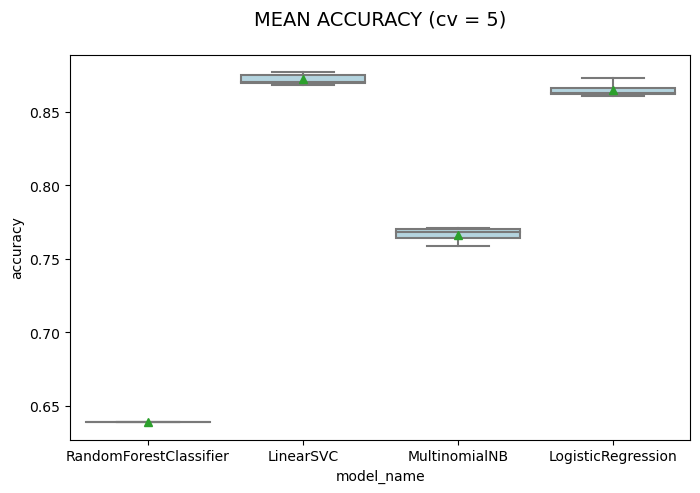

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

# The LinearSVC has the best Mean Accuracy so we go with selecting LinearSVC for predictions

# Model Evaluation of LinearSVC

In [54]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, df2.index, test_size=0.25,random_state=1)                                                                                                                        
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy metrics

In [55]:
from sklearn.metrics import classification_report

In [56]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(classification_report(y_test, y_pred, target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                    precision    recall  f1-score   support

                     Consumer Loan       0.91      0.95      0.93      1592
Credit reporting, repair, or other       0.89      0.84      0.86       192
                          Mortgage       0.85      0.79      0.82       370
                   Debt collection       0.82      0.70      0.75       346

                          accuracy                           0.89      2500
                         macro avg       0.87      0.82      0.84      2500
                      weighted avg       0.89      0.89      0.89      2500



We can see that the consumer Loan got the high precsion score 

# Consfusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [50]:
category_id = df2[['Product', 'category_id']].drop_duplicates()

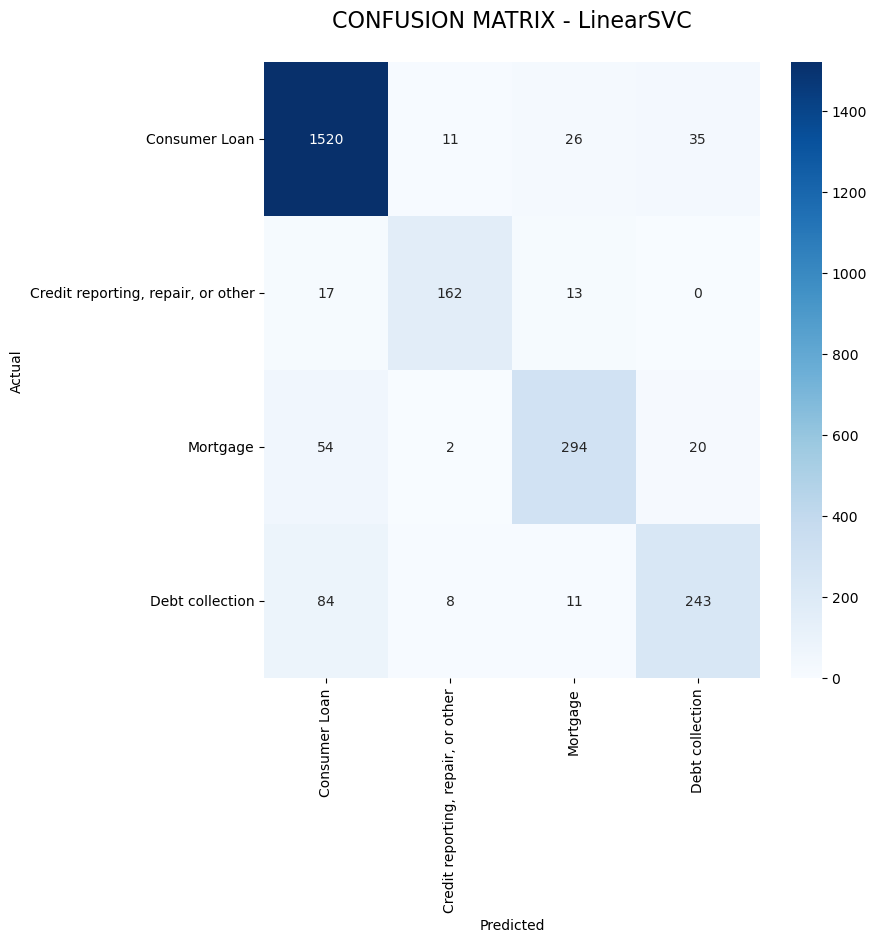

In [51]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',xticklabels=category_id.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

# Predictions


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)